In [4]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut


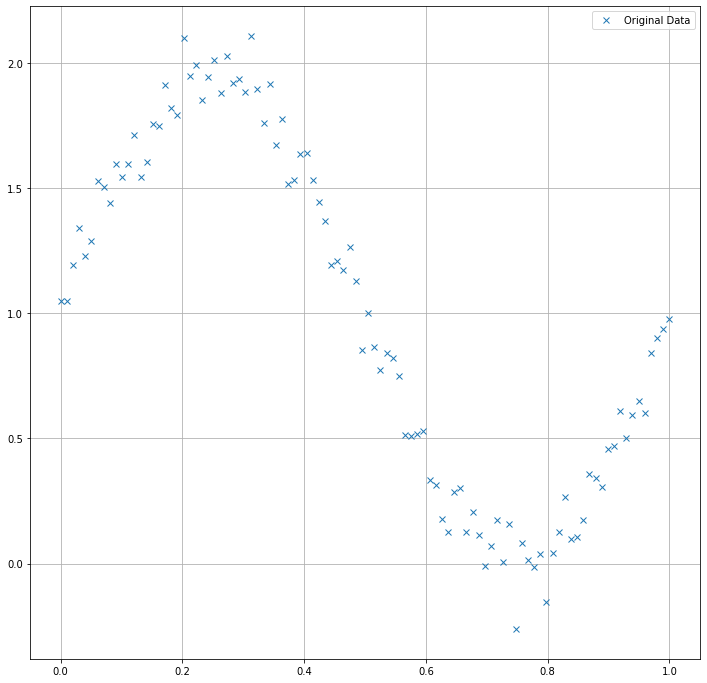

In [5]:
# Reading of Table data
df = pd.read_csv('./reg_poli.csv', header=None)
                 
x = df[0].to_numpy()
y = df[1].to_numpy()

# Vector Transformation to Columns
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

fig = plt.figure(figsize=(12,12))
plt.plot(x, y, 'x', label='Original Data')

#plt.plot(x, y)
plt.legend()
plt.grid()

In [6]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

include_bias = False

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('training set size:', len(y_train))
print('training set size:', len(y_val))

error_train = []
error_val = []


for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    # Perform polynomial regression.Training sets for test and validation.
    polynomial_regression.fit(x_val, y_val)
    polynomial_regression.fit(x_train, y_train)
    
    # Prediction sets for test and validation
    y_val_predict = polynomial_regression.predict(x_val)
    y_train_predict = polynomial_regression.predict(x_train)
    
    # Erro quadrático médio para os conjuntos de teste e validação.
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

training set size: 70
training set size: 30
Tempo de execução: 0.0385 [s]


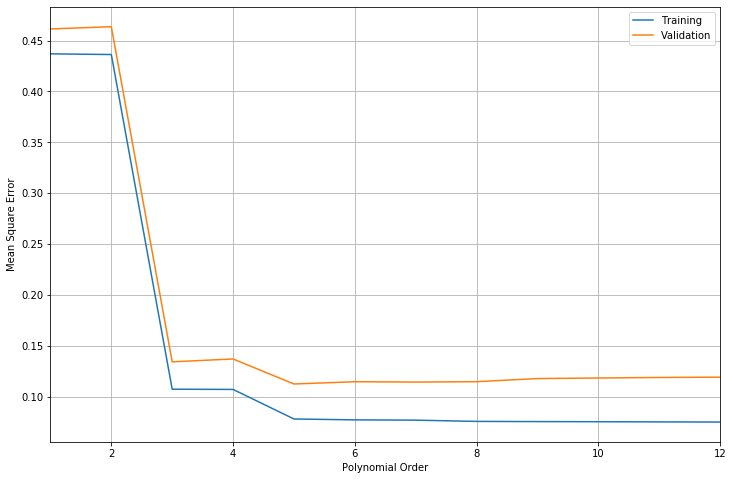

In [7]:
# MS Error vs. PO Holdout
plt.figure(figsize=(12, 8))
plt.plot(range(1, 13), error_train, label='Training')
plt.plot(range(1, 13), error_val, label='Validation')
plt.xlabel('Polynomial Order',  fontsize=10)
plt.ylabel('Mean Square Error',  fontsize=10)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

In [8]:
# K-fold (K=10)
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []

for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Time Execution: %1.4f [s]" % (timeit.default_timer() - starttime))

Time Execution: 0.2124 [s]


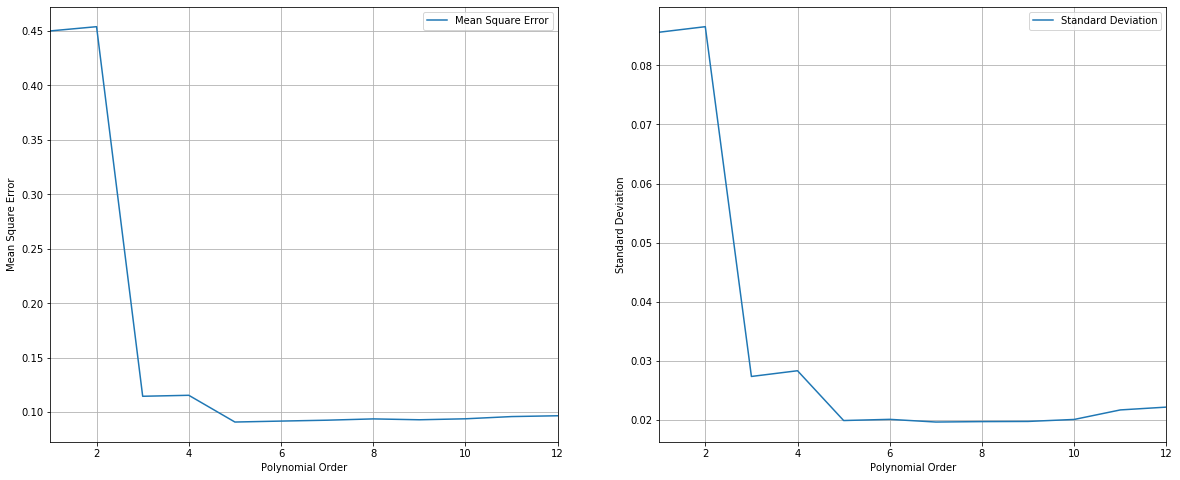

In [10]:
import matplotlib.pyplot as plt # entrei com esta importação, pois o código estava dando erro.
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.xlabel('Polynomial Order',  fontsize=10)
plt.ylabel('Mean Square Error',  fontsize=10)
plt.plot(range(1, 13), mean_vec,  label='Mean Square Error')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.xlabel('Polynomial Order',  fontsize=10)
plt.ylabel('Standard Deviation',  fontsize=10)
plt.plot(range(1, 13), std_vec,  label='Standard Deviation')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

In [11]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LPOCV object.
lpocv = LeavePOut(p=1)

mean_vec = []
std_vec = []
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 1.9977 [s]


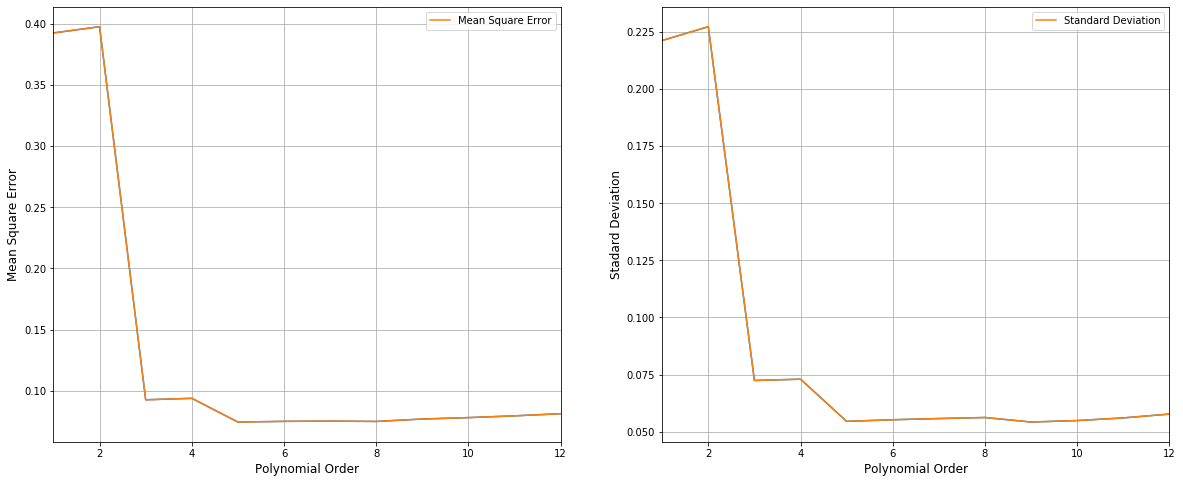

In [12]:
# Plot results.
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec)
plt.xlabel('Polynomial Order', fontsize=12)
plt.ylabel('Mean Square Error', fontsize=12)
plt.plot(range(1, 13), mean_vec,  label='Mean Square Error')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), std_vec)
plt.xlabel('Polynomial Order', fontsize=12)
plt.ylabel('Stadard Deviation', fontsize=12)
plt.plot(range(1, 13), std_vec,  label='Standard Deviation')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

# Save figure
#plt.savefig("leave_p_out.png", dpi=600)
#Show the plot.
plt.show()

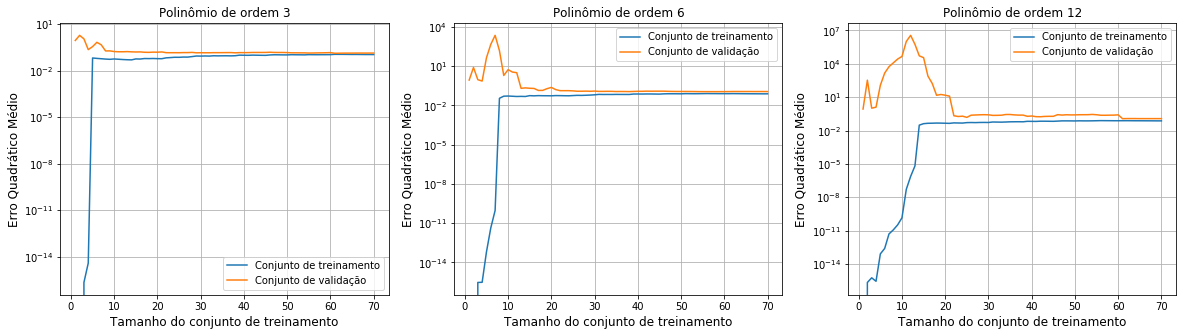

In [13]:
# Curvas de Aprendizado
degrees = [3, 6, 12]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=12)
    plt.ylabel('Erro Quadrático Médio', fontsize=12)
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
plt.show()

In [14]:
# Modelo de treinamento
degree = 5

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)

# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()

# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])

# Train model
polynomial_regression.fit(x, y)
   
# Predição do conjunto de treinamento.    
y_predicao = polynomial_regression.predict(x)
  

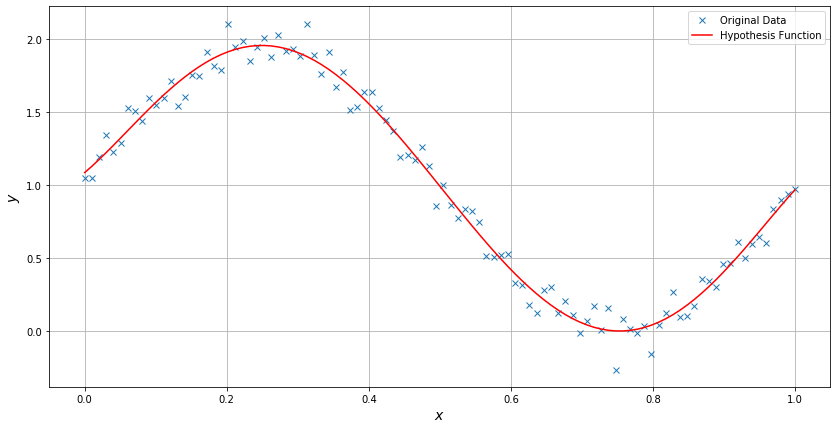

In [11]:
# Plot error.
fig = plt.figure(figsize=(14,8))
plt.plot(x, y, 'x', label="Original Data")
plt.plot(x, y_predicao, 'r', label="Hypothesis Function")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$ x $', fontsize=10)
plt.ylabel('$ y $', fontsize=10)
#plt.legend(loc='upper right')
plt.legend()
plt.grid()
# Save figure
#plt.savefig("ridge_regression_mse.png", dpi=600)
#Show the plot.
plt.show()